In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/D1.csv'

Mounted at /content/drive


In [3]:
df = pd.read_csv(file_path)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
print(f"Row number : {df.shape[0]}")
print(f"column number: {df.shape[1]}")

Row number : 9551
column number: 21


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
print(df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [13]:
print(df['Aggregate rating'].value_counts())

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [14]:
print(df['Country Code'].value_counts())
print(df['City'].value_counts())
print(df['Cuisines'].value_counts())

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, 

In [15]:
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cities = df['City'].value_counts().head(10)
print(top_cuisines)
print(top_cities)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [6]:
print("\n Missing values ​​in each column:")
missing_values = df.isnull().sum()
print(missing_values)


 Missing values ​​in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [7]:
print(df['Cuisines'].isnull().sum())


9


In [8]:
df['Cuisines'] = df['Cuisines'].fillna('Not Specified')


In [9]:
print(df['Cuisines'].isnull().sum())
print(df['Cuisines'].unique())


0
['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


In [10]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s,;.-]+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    return text

In [16]:
city_distribution = df.groupby('City').size()
country_distribution = df.groupby('Country Code').size()
print(city_distribution)
print(country_distribution)

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Length: 141, dtype: int64
Country Code
1      8652
14       24
30       60
37        4
94       21
148      40
162      22
166      20
184      20
189      60
191      20
208      34
214      60
215      80
216     434
dtype: int64


In [22]:
import re


def clean_text(text):
    if isinstance(text, str):

        text = re.sub(r'[^\x00-\x7F]+', '', text)

        text = re.sub(r'[^\w\s,;.-]+', '', text)

        text = re.sub(r'\s+', ' ', text).strip()
    return text


for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].apply(clean_text)

print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

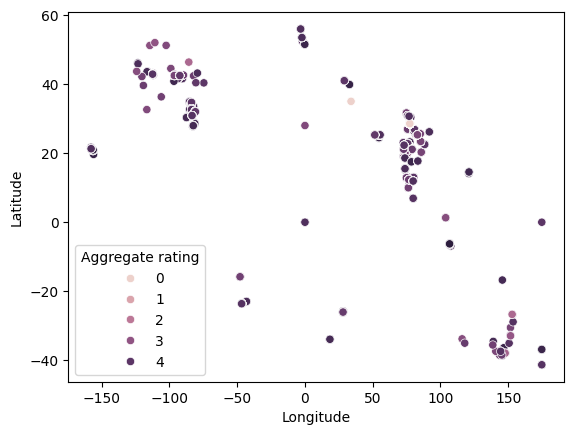

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم العلاقة بين التقييم والموقع الجغرافي
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df)
plt.show()

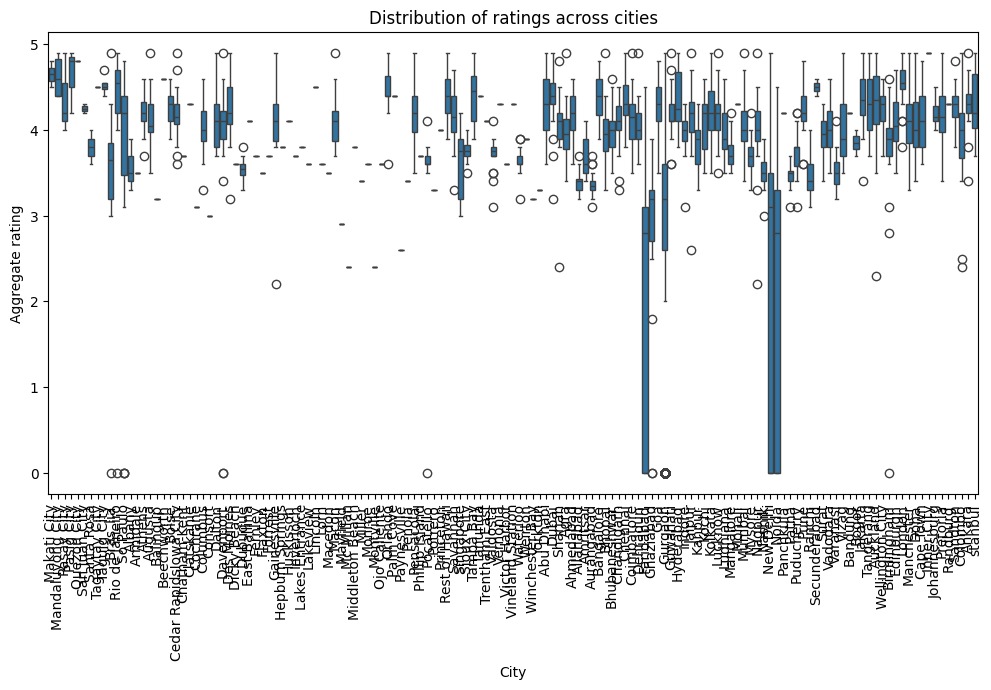

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Aggregate rating', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of ratings across cities')
plt.show()


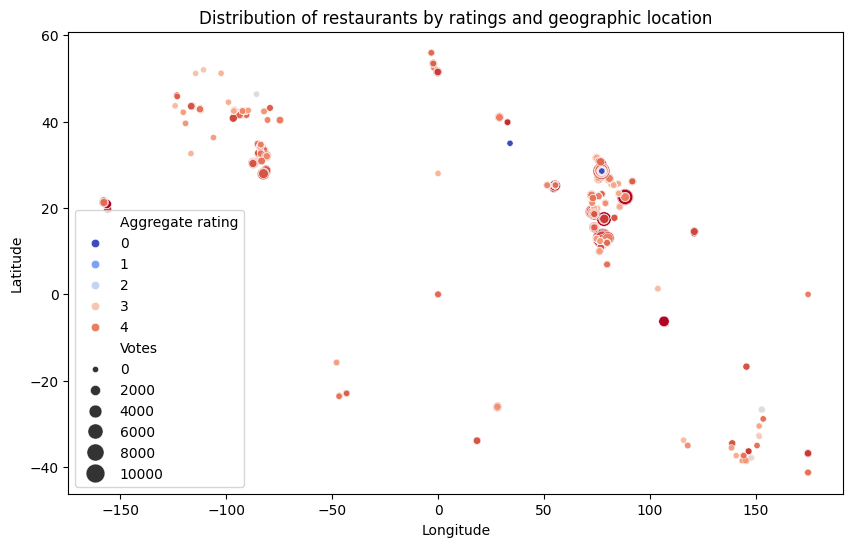

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df, palette='coolwarm', size='Votes', sizes=(20, 200))
plt.title('Distribution of restaurants by ratings and geographic location')
plt.show()


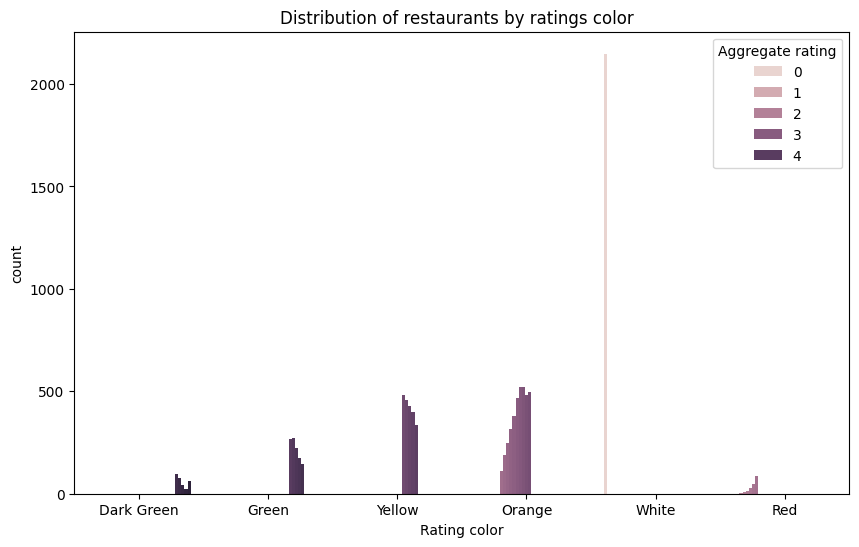

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating color', hue='Aggregate rating', data=df)
plt.title('Distribution of restaurants by ratings color  ')
plt.show()


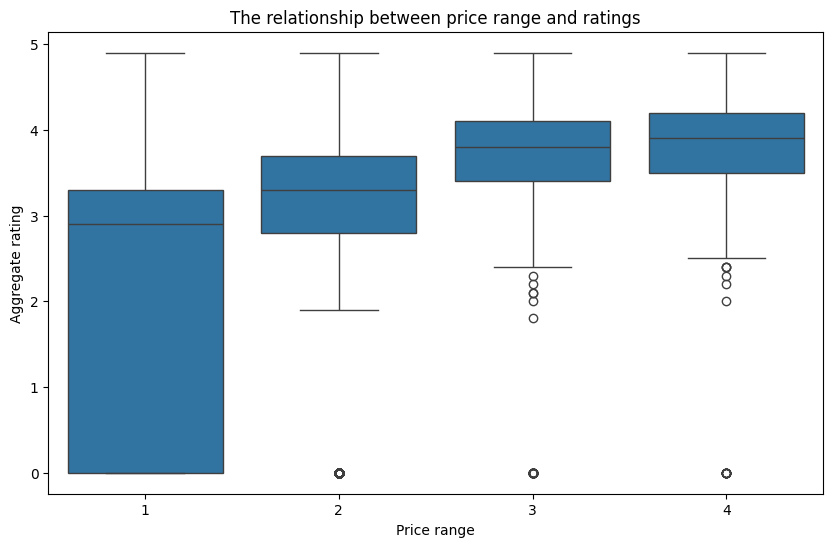

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('The relationship between price range and ratings')
plt.show()

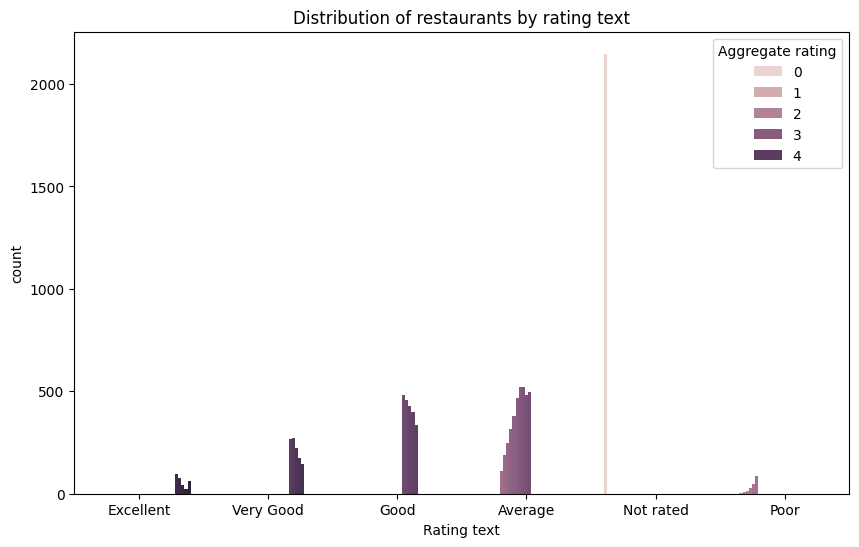

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating text', hue='Aggregate rating', data=df)
plt.title('Distribution of restaurants by rating text')
plt.show()

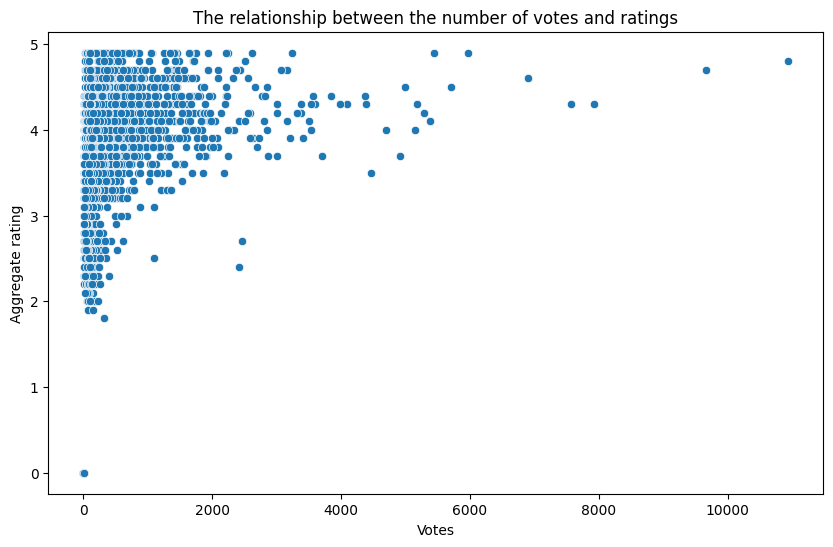

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('The relationship between the number of votes and ratings')
plt.show()


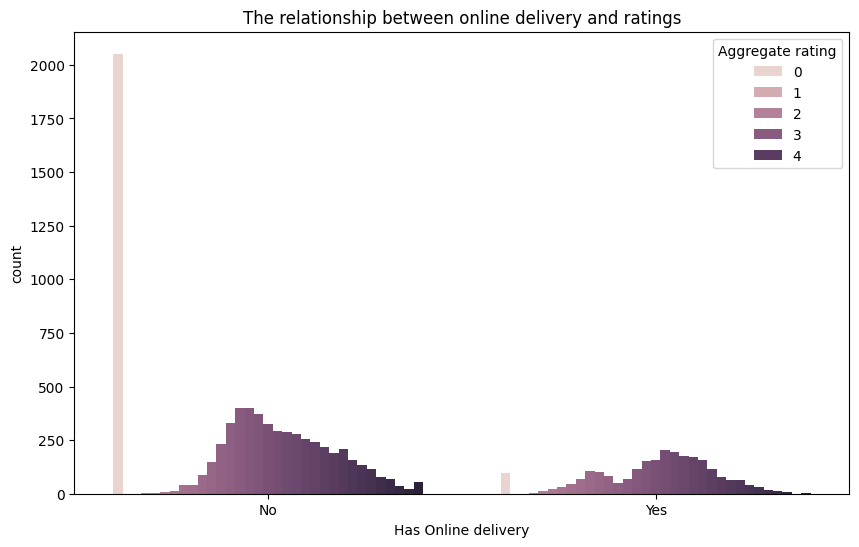

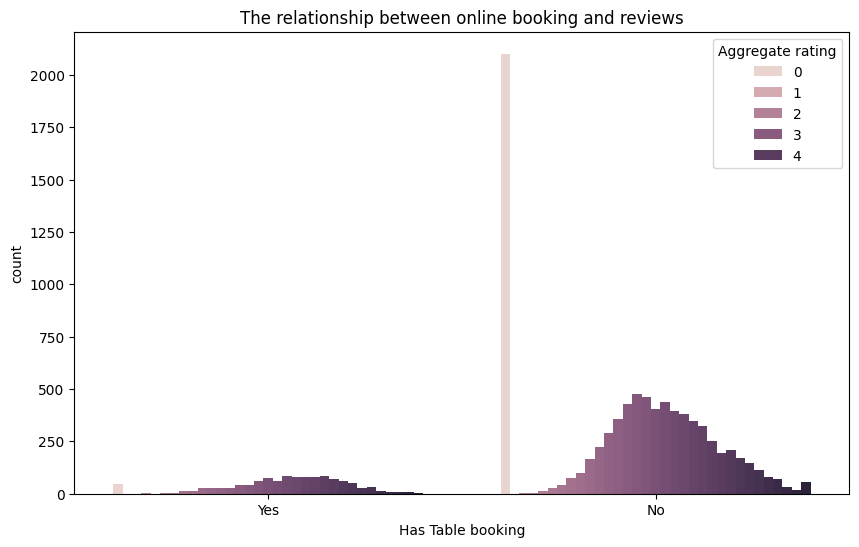

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Has Online delivery', hue='Aggregate rating', data=df)
plt.title('The relationship between online delivery and ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Has Table booking', hue='Aggregate rating', data=df)
plt.title('The relationship between online booking and reviews')
plt.show()

In [33]:
# حساب النسبة المئوية للمطاعم التي تقدم حجز الطاولات
table_booking_percentage = (df['Has Table booking'].value_counts(normalize=True) * 100).get('Yes', 0)

# حساب النسبة المئوية للمطاعم التي تقدم التوصيل عبر الإنترنت
online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100).get('Yes', 0)

# طباعة النتائج
print(f"النسبة المئوية للمطاعم التي تقدم حجز الطاولات: {table_booking_percentage:.2f}%")
print(f"النسبة المئوية للمطاعم التي تقدم التوصيل عبر الإنترنت: {online_delivery_percentage:.2f}%")


النسبة المئوية للمطاعم التي تقدم حجز الطاولات: 12.12%
النسبة المئوية للمطاعم التي تقدم التوصيل عبر الإنترنت: 25.66%


In [34]:
# حساب متوسط التقييمات للمطاعم التي تقدم حجز الطاولات
avg_rating_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()

# حساب متوسط التقييمات للمطاعم التي لا تقدم حجز الطاولات
avg_rating_no_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

# طباعة النتائج
print(f"متوسط التقييمات للمطاعم التي تقدم حجز الطاولات: {avg_rating_table_booking:.2f}")
print(f"متوسط التقييمات للمطاعم التي لا تقدم حجز الطاولات: {avg_rating_no_table_booking:.2f}")


متوسط التقييمات للمطاعم التي تقدم حجز الطاولات: 3.44
متوسط التقييمات للمطاعم التي لا تقدم حجز الطاولات: 2.56


<ipython-input-35-6838b4af821f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values, palette='viridis')


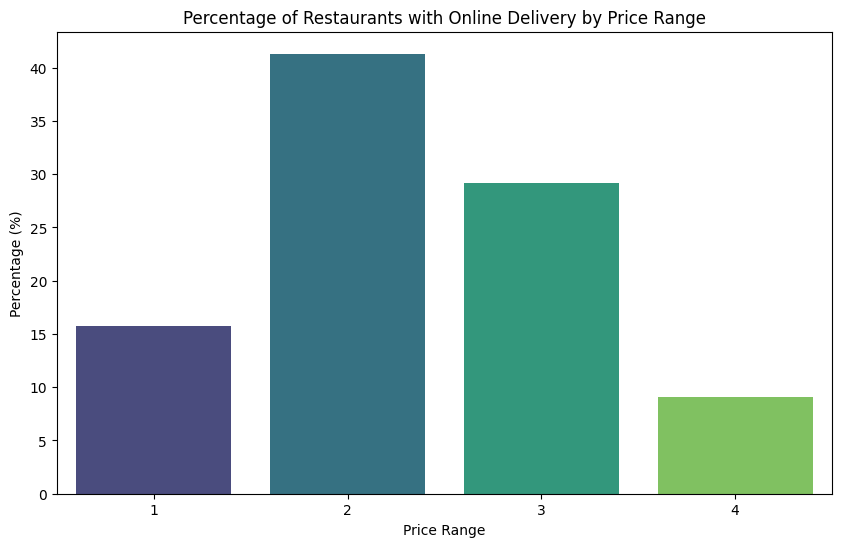

In [35]:
# Step 1: Filter restaurants with online delivery
online_delivery_data = df[df['Has Online delivery'] == 'Yes']

# Step 2: Count restaurants with online delivery per price range
online_delivery_by_price = online_delivery_data.groupby('Price range').size()

# Step 3: Count total restaurants per price range
total_by_price = df.groupby('Price range').size()

# Step 4: Calculate percentage of online delivery by price range
online_delivery_percentage = (online_delivery_by_price / total_by_price) * 100

# Step 5: Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values, palette='viridis')
plt.title("Percentage of Restaurants with Online Delivery by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage (%)")
plt.show()


In [36]:
# حساب متوسط التقييم لكل نطاق سعري
price_range_avg_rating = df.groupby('Price range')['Aggregate rating'].mean()

# عرض النتيجة
print(price_range_avg_rating)


Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [37]:
# تحديد اللون المرتبط بأعلى متوسط تقييم
max_avg_rating = price_range_avg_rating.max()
best_price_range = price_range_avg_rating.idxmax()

# استخراج اللون الذي يمثل أعلى متوسط تقييم
best_rating_color = df[df['Price range'] == best_price_range]['Rating color'].mode()[0]

print(f"أفضل نطاق سعري هو: {best_price_range} مع متوسط تقييم: {max_avg_rating}")
print(f"اللون الذي يمثل أعلى تقييم هو: {best_rating_color}")


أفضل نطاق سعري هو: 4 مع متوسط تقييم: 3.8179180887372017
اللون الذي يمثل أعلى تقييم هو: Yellow


In [38]:
# إضافة عمود لطول اسم المطعم
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)


In [39]:
# إضافة عمود لطول عنوان المطعم
df['Address Length'] = df['Address'].apply(len)


In [40]:
# ترميز الميزات التي تحتوي على قيم نصية "Yes" و "No" إلى 1 و 0
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)


In [41]:
# إضافة ميزة طول اسم المطعم
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

# إضافة ميزة طول العنوان
df['Address Length'] = df['Address'].apply(len)


In [42]:
# عرض أول 5 صفوف من البيانات
df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head()


,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


In [43]:
# ترميز الأعمدة الفئوية إلى قيم عددية
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)


In [44]:
# عرض أول 5 صفوف بعد الترميز
df[['Has Table booking', 'Has Online delivery']].head()


,Has Table booking,Has Online delivery
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [45]:
# تحليل متوسط التقييمات حسب حجز الطاولة (Has Table booking)
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("متوسط التقييمات حسب حجز الطاولة:")
print(avg_rating_table_booking)

# تحليل متوسط التقييمات حسب التوصيل عبر الإنترنت (Has Online delivery)
avg_rating_online_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("متوسط التقييمات حسب التوصيل عبر الإنترنت:")
print(avg_rating_online_delivery)


متوسط التقييمات حسب حجز الطاولة:
Has Table booking
0    2.66637
Name: Aggregate rating, dtype: float64
متوسط التقييمات حسب التوصيل عبر الإنترنت:
Has Online delivery
0    2.66637
Name: Aggregate rating, dtype: float64


<ipython-input-46-6ec3f957cca4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Price range', y='Aggregate rating', palette='Set2')


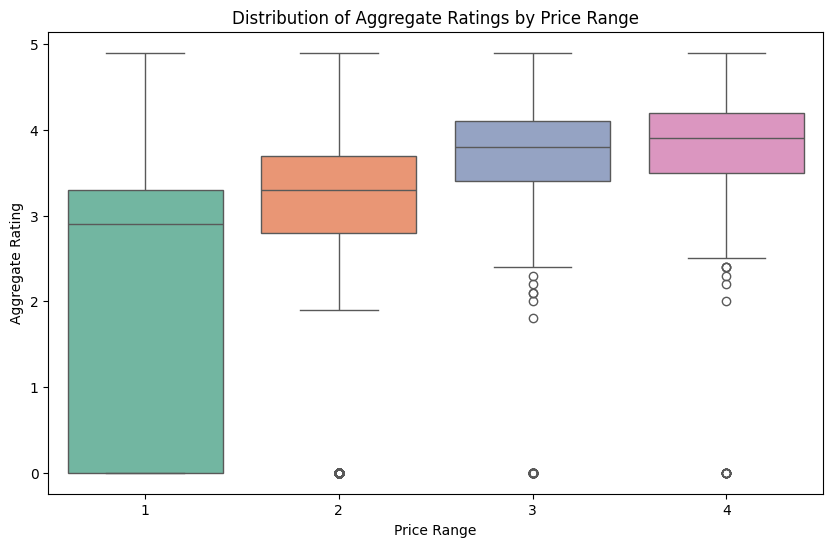

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the distribution of ratings by price range
sns.boxplot(data=df, x='Price range', y='Aggregate rating', palette='Set2')

# Adding labels and title
plt.title('Distribution of Aggregate Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')

# Show the plot
plt.show()


Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64
Rating color
Dark Green    4.659801
Green         4.168119
Orange        3.051619
Red           2.297849
White         0.000000
Yellow        3.683429
Name: Aggregate rating, dtype: float64


<ipython-input-47-36932c86b007>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_avg_ratings.index, y=color_avg_ratings.values, palette="viridis")


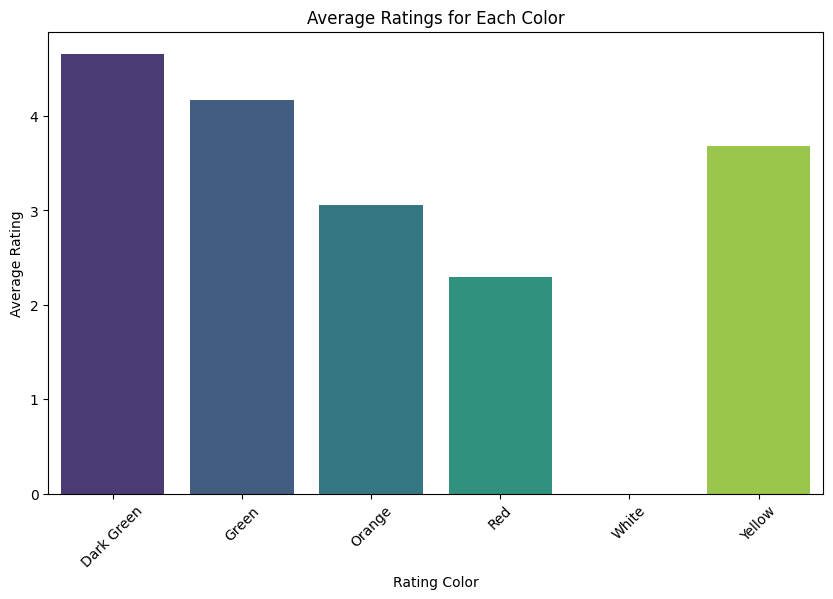

In [47]:
# حساب عدد المطاعم حسب اللون
color_counts = df['Rating color'].value_counts()

# حساب متوسط التقييم لكل لون
color_avg_ratings = df.groupby('Rating color')['Aggregate rating'].mean()

# عرض النتائج
print(color_counts)
print(color_avg_ratings)

# رسم بياني للتوزيع
import matplotlib.pyplot as plt
import seaborn as sns

# رسم توزيع التقييمات لكل لون
plt.figure(figsize=(10, 6))
sns.barplot(x=color_avg_ratings.index, y=color_avg_ratings.values, palette="viridis")
plt.title('Average Ratings for Each Color')
plt.xlabel('Rating Color')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [48]:
# حساب متوسط التقييمات حسب اللون
average_rating_by_color = df.groupby('Rating color')['Aggregate rating'].mean()

# عرض النتائج
print(average_rating_by_color)


Rating color
Dark Green    4.659801
Green         4.168119
Orange        3.051619
Red           2.297849
White         0.000000
Yellow        3.683429
Name: Aggregate rating, dtype: float64


In [49]:
# حساب متوسط التقييم لكل نوع من المأكولات
cuisine_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# عرض النتائج
print(cuisine_avg_rating)

Cuisines
Continental, Indian                     4.9
Hawaiian, Seafood                       4.9
American, Burger, Grill                 4.9
European, Asian, Indian                 4.9
European, Contemporary                  4.9
                                       ... 
Nepalese, Tibetan                       0.0
North Indian, Fast Food, Mithai         0.0
Seafood, Mughlai, North Indian          0.0
North Eastern, North Indian, Chinese    0.0
Cafe, Tibetan                           0.0
Name: Aggregate rating, Length: 1826, dtype: float64


In [50]:
# حساب عدد الأصوات لكل نوع من المأكولات
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# عرض النتائج
print(cuisine_votes)


Cuisines
North Indian, Mughlai                                             53747
North Indian                                                      46241
North Indian, Chinese                                             42012
Cafe                                                              30657
Chinese                                                           21925
                                                                  ...  
Mithai, South Indian, Chinese, Street Food                            0
Cafe, Tibetan                                                         0
North Indian, South Indian, Chinese, Healthy Food, Bakery             0
North Indian, South Indian, Chinese, Fast Food, Bakery, Mithai        0
Burger, Pizza, Fast Food                                              0
Name: Votes, Length: 1826, dtype: int64


In [51]:
# حساب متوسط التقييم لكل نوع من المأكولات
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# عرض النتائج
print(cuisine_rating)


Cuisines
Continental, Indian                     4.9
Hawaiian, Seafood                       4.9
American, Burger, Grill                 4.9
European, Asian, Indian                 4.9
European, Contemporary                  4.9
                                       ... 
Nepalese, Tibetan                       0.0
North Indian, Fast Food, Mithai         0.0
Seafood, Mughlai, North Indian          0.0
North Eastern, North Indian, Chinese    0.0
Cafe, Tibetan                           0.0
Name: Aggregate rating, Length: 1826, dtype: float64


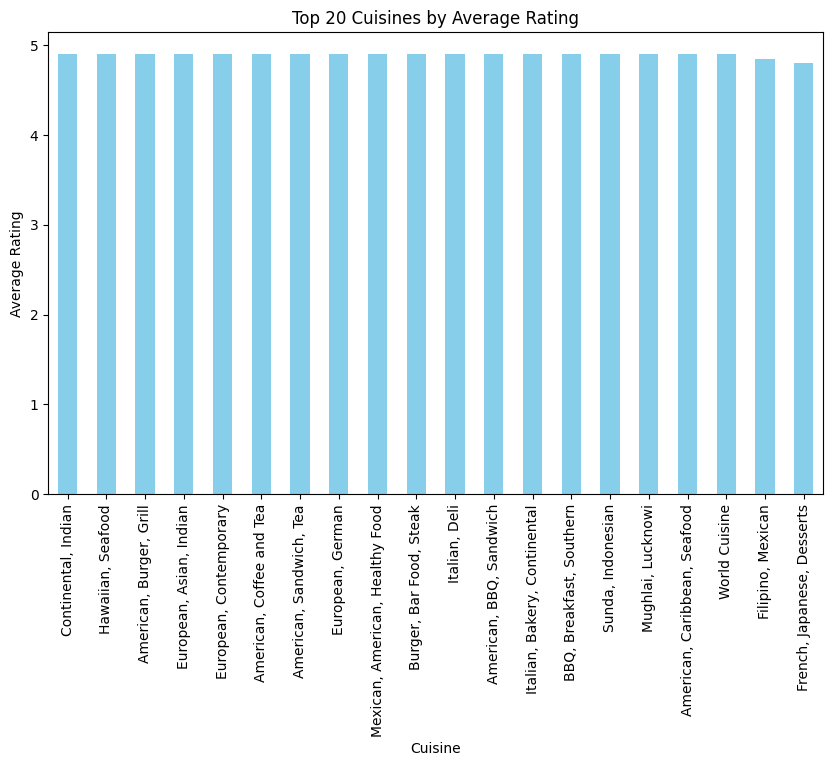

In [52]:
import matplotlib.pyplot as plt

# إنشاء الرسم البياني لعرض التوزيع
plt.figure(figsize=(10,6))
cuisine_rating.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


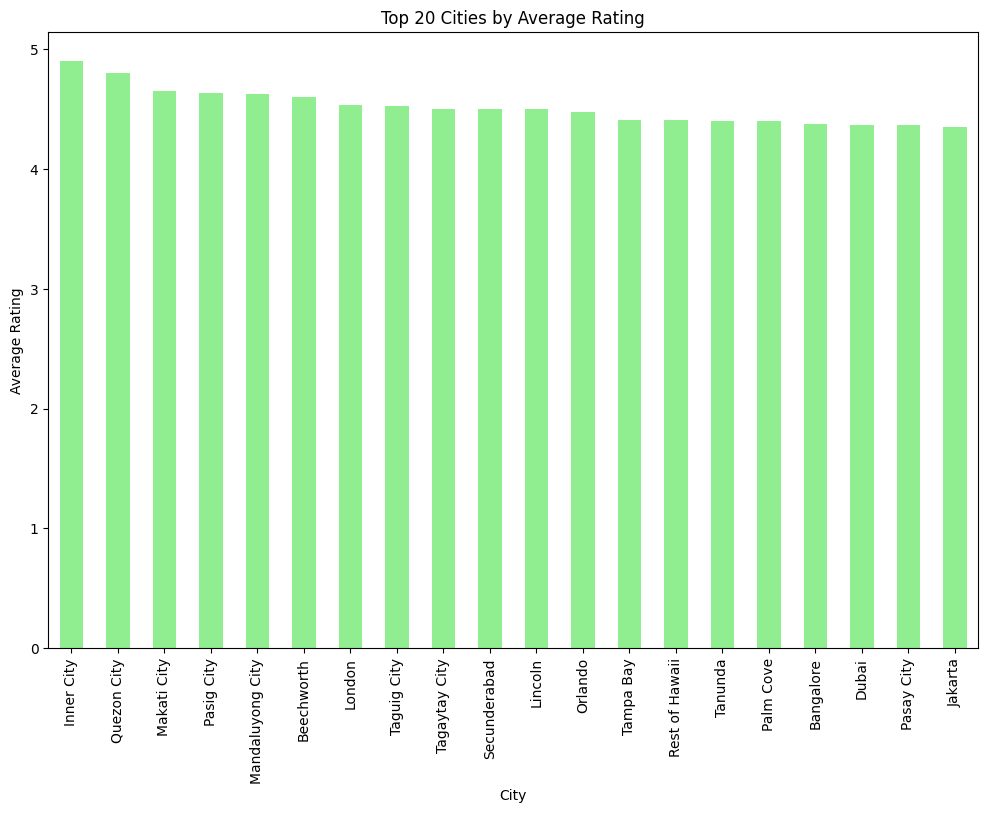

In [54]:
# حساب متوسط التقييمات لكل مدينة
city_rating = df.groupby('City')['Aggregate rating'].mean()

# ترتيب المدن حسب التقييم المتوسط
sorted_city_rating = city_rating.sort_values(ascending=False)

# رسم التوزيع باستخدام مخطط شريطي
plt.figure(figsize=(12, 8))
sorted_city_rating.head(20).plot(kind='bar', color='lightgreen')
plt.title('Top 20 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


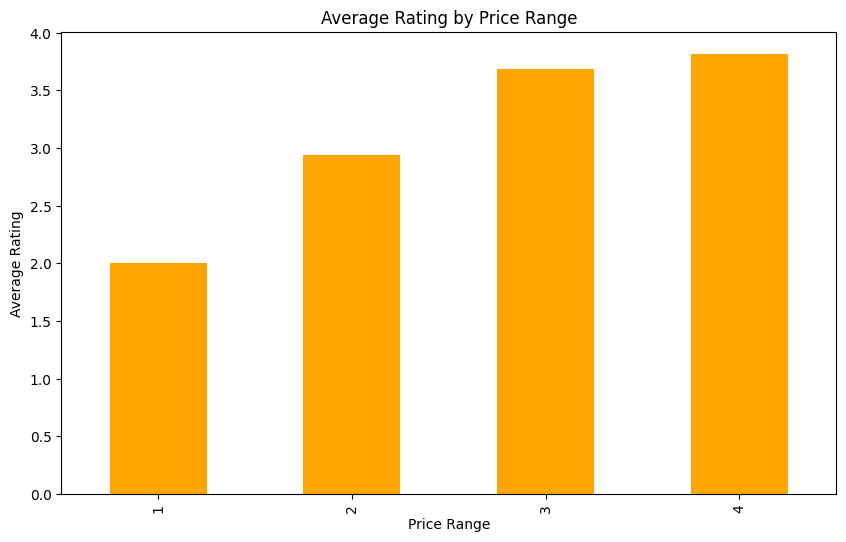

<Figure size 1000x600 with 0 Axes>

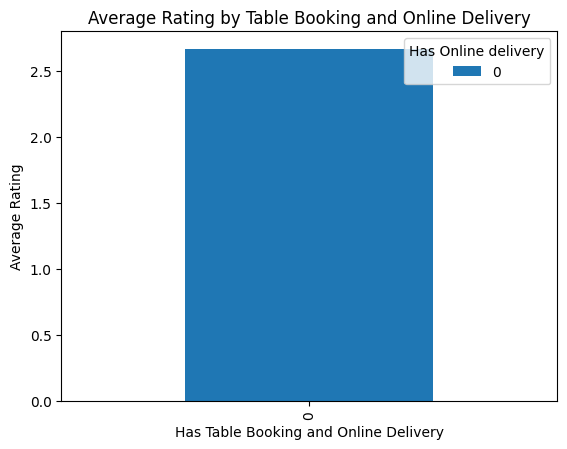

In [55]:
# رسم العلاقة بين السعر والتقييم
plt.figure(figsize=(10, 6))
df.groupby('Price range')['Aggregate rating'].mean().plot(kind='bar', color='orange')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

# رسم العلاقة بين "Has Table Booking" و "Has Online Delivery"
plt.figure(figsize=(10, 6))
df.groupby(['Has Table booking', 'Has Online delivery'])['Aggregate rating'].mean().unstack().plot(kind='bar', stacked=True)
plt.title('Average Rating by Table Booking and Online Delivery')
plt.xlabel('Has Table Booking and Online Delivery')
plt.ylabel('Average Rating')
plt.show()


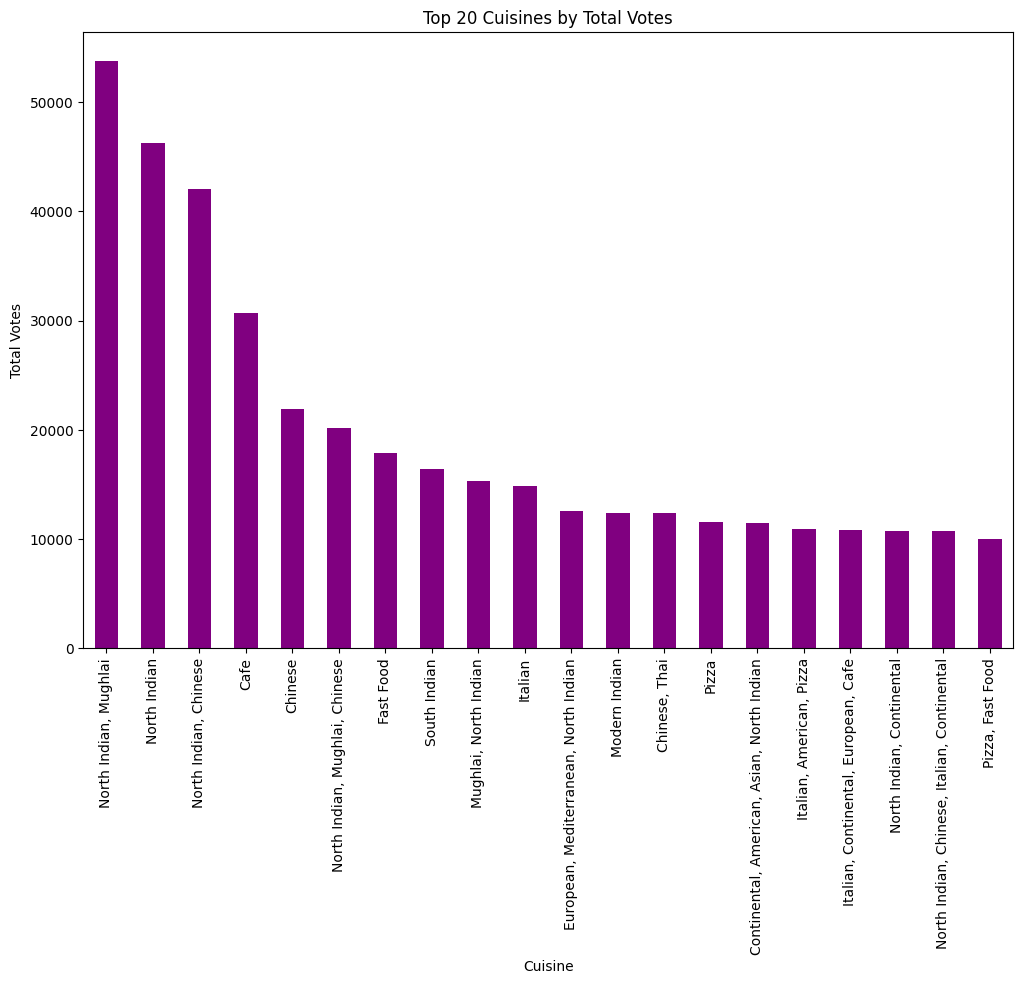

In [56]:
# حساب عدد الأصوات لكل نوع مأكولات
cuisine_votes = df.groupby('Cuisines')['Votes'].sum()

# ترتيب المأكولات حسب عدد الأصوات
sorted_cuisine_votes = cuisine_votes.sort_values(ascending=False)

# رسم التوزيع باستخدام مخطط شريطي
plt.figure(figsize=(12, 8))
sorted_cuisine_votes.head(20).plot(kind='bar', color='purple')
plt.title('Top 20 Cuisines by Total Votes')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()


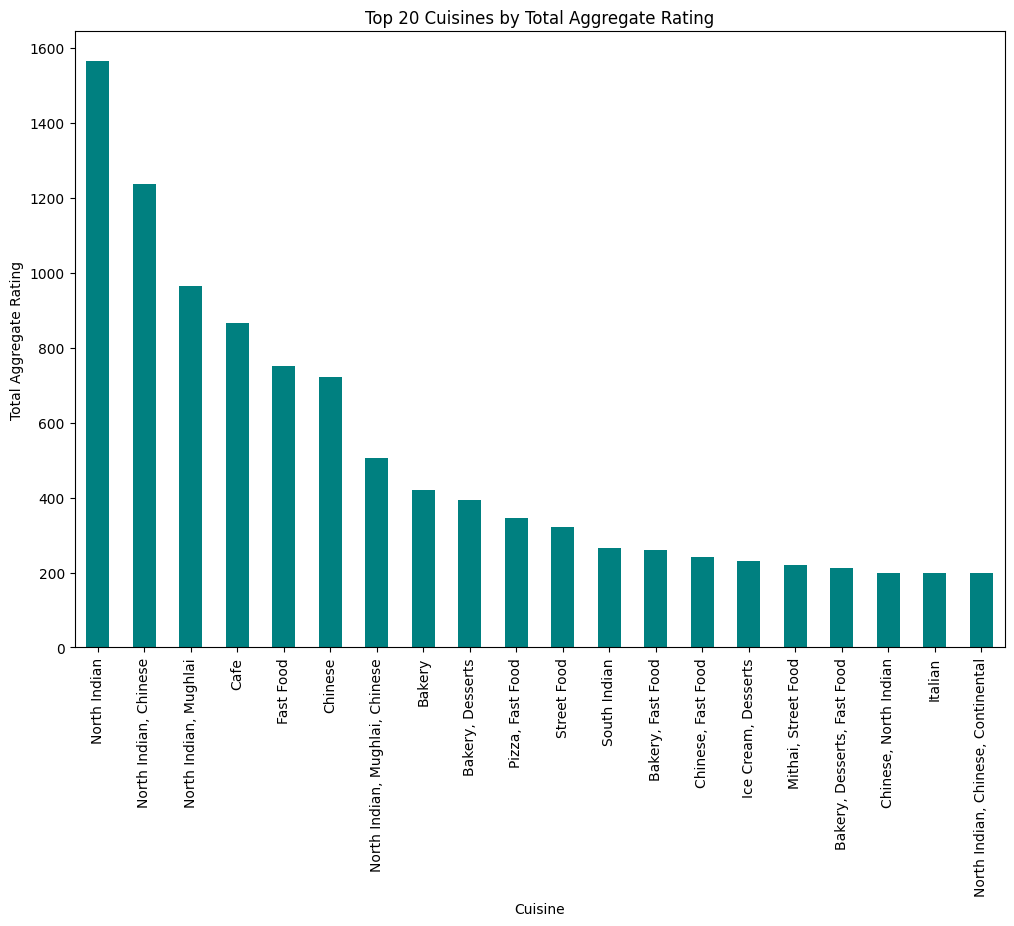

In [57]:
# حساب مجموع التقييمات لكل نوع مأكولات
cuisine_aggregate_rating = df.groupby('Cuisines')['Aggregate rating'].sum()

# ترتيب المأكولات حسب مجموع التقييمات
sorted_cuisine_aggregate_rating = cuisine_aggregate_rating.sort_values(ascending=False)

# رسم التوزيع باستخدام مخطط شريطي
plt.figure(figsize=(12, 8))
sorted_cuisine_aggregate_rating.head(20).plot(kind='bar', color='teal')
plt.title('Top 20 Cuisines by Total Aggregate Rating')
plt.xlabel('Cuisine')
plt.ylabel('Total Aggregate Rating')
plt.xticks(rotation=90)
plt.show()


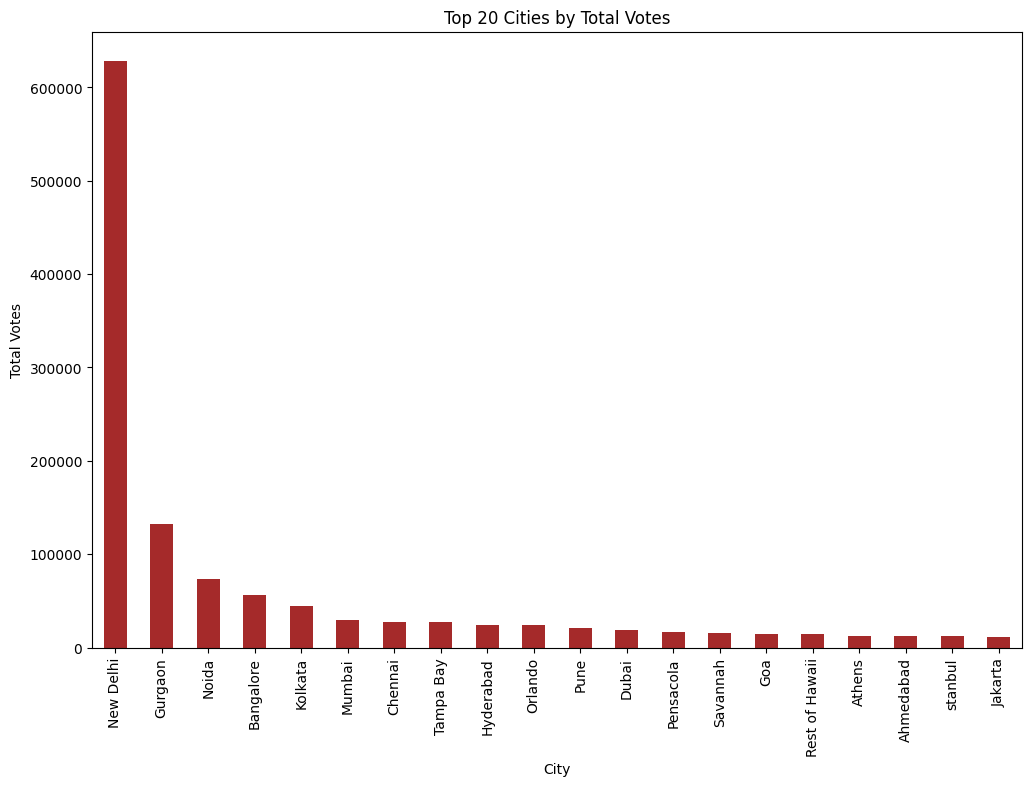

In [58]:
# حساب عدد الأصوات لكل مدينة
city_votes = df.groupby('City')['Votes'].sum()

# ترتيب المدن حسب عدد الأصوات
sorted_city_votes = city_votes.sort_values(ascending=False)

# رسم التوزيع باستخدام مخطط شريطي
plt.figure(figsize=(12, 8))
sorted_city_votes.head(20).plot(kind='bar', color='brown')
plt.title('Top 20 Cities by Total Votes')
plt.xlabel('City')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()


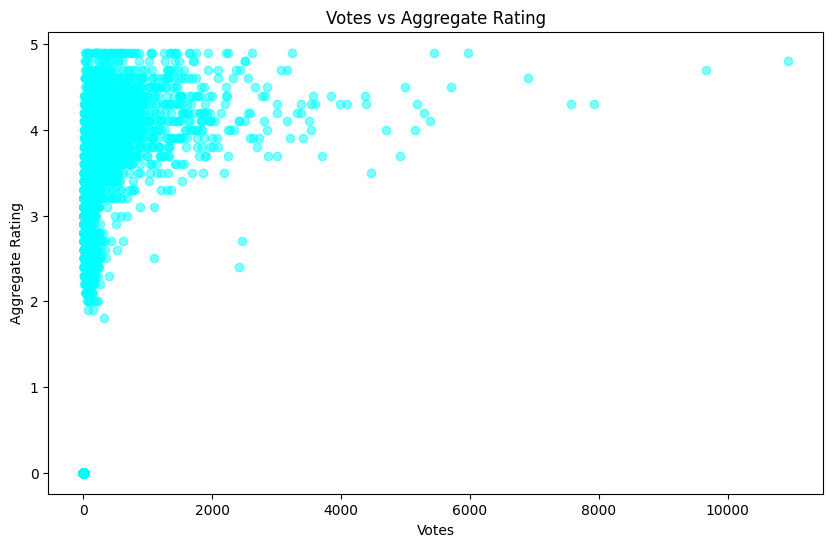

In [59]:
# رسم العلاقة بين عدد الأصوات والتقييمات باستخدام scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5, color='cyan')
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()


In [61]:
# تشفير الأعمدة النصية (Cuisines, City)
label_encoder = LabelEncoder()

df['Cuisines'] = label_encoder.fit_transform(df['Cuisines'])
df['City'] = label_encoder.fit_transform(df['City'])

# تحديد الميزات (X) والمتغير المستهدف (y)
X = df[['Cuisines', 'City', 'Votes']]  # الميزات
y = df['Aggregate rating']  # المتغير المستهدف


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# بناء النموذج
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


RMSE: 1.4220378091995842
R^2: 0.11155768928350185


In [64]:
from sklearn.tree import DecisionTreeRegressor

# بناء النموذج
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_tree_pred = tree_model.predict(X_test)

# تقييم النموذج
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, y_tree_pred)

print(f"Decision Tree RMSE: {tree_rmse}")
print(f"Decision Tree R^2: {tree_r2}")


Decision Tree RMSE: 0.44761935983760504
Decision Tree R^2: 0.9119712227514273


In [65]:
from sklearn.ensemble import RandomForestRegressor

# بناء النموذج
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_forest_pred = forest_model.predict(X_test)

# تقييم النموذج
forest_mse = mean_squared_error(y_test, y_forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, y_forest_pred)

print(f"Random Forest RMSE: {forest_rmse}")
print(f"Random Forest R^2: {forest_r2}")


Random Forest RMSE: 0.33684580327422736
Random Forest R^2: 0.9501495334069958


In [70]:
# استيراد مكتبة LinearRegression
from sklearn.linear_model import LinearRegression

# إنشاء نموذج الانحدار الخطي
linear_regressor = LinearRegression()

# تدريب النموذج
linear_regressor.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred_linear = linear_regressor.predict(X_test)

# حساب RMSE و R^2
from sklearn.metrics import mean_squared_error, r2_score

# حساب RMSE و R^2
RMSE_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))  # حساب الجذر التربيعي لمتوسط الخطأ التربيعي
R2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression RMSE: {RMSE_linear}")
print(f"Linear Regression R^2: {R2_linear}")

Linear Regression RMSE: 1.4220378091995842
Linear Regression R^2: 0.11155768928350185


In [75]:
df = df.select_dtypes(include=[np.number])  # الاحتفاظ بالأعمدة التي تحتوي على قيم عددية فقط

In [79]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np  # استيراد مكتبة numpy لحساب الجذر التربيعي

# التأكد من وجود قيم مفقودة في البيانات
df_cleaned = df_cleaned.dropna()  # إزالة الصفوف التي تحتوي على قيم مفقودة

# إذا كان هناك أي عمود فئوي (مثل المطبخ أو المدينة)، نقوم بترميز القيم النصية إلى قيم عددية
label_encoder = LabelEncoder()

# ترميز عمود المطبخ (Cuisine) أو أي عمود آخر فئوي
# قد تحتاج إلى ترميز المزيد من الأعمدة إذا كانت تحتوي على بيانات نصية
df_cleaned['Cuisines'] = label_encoder.fit_transform(df_cleaned['Cuisines'].astype(str))

# التأكد من أن جميع الأعمدة التي نحتاجها هي عددية قبل التطبيق
# تحويل جميع الأعمدة إلى قيم عددية حيثما كان ذلك مناسبًا
# إذا كانت بعض الأعمدة غير قابلة للتحويل، يجب أن نتأكد من استبعادها
# في هذا المثال سنحتفظ فقط بالأعمدة التي يمكن استخدامها في النموذج
df_cleaned = df_cleaned.select_dtypes(include=['number']).copy()

# تقسيم البيانات إلى ميزات (X) ومتغير الهدف (y)
X = df_cleaned.drop(columns=['Aggregate rating'])
y = df_cleaned['Aggregate rating']

# توحيد البيانات (Normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# تطبيق Ridge Regression (L2 Regularization)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# حساب RMSE و R^2 لـ Ridge
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))  # استخدام np.sqrt لحساب الجذر التربيعي يدويًا
ridge_r2 = r2_score(y_test, y_pred_ridge)

# تطبيق Lasso Regression (L1 Regularization)
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# حساب RMSE و R^2 لـ Lasso
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))  # استخدام np.sqrt لحساب الجذر التربيعي يدويًا
lasso_r2 = r2_score(y_test, y_pred_lasso)

# عرض النتائج
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Ridge Regression R^2: {ridge_r2}")
print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Lasso Regression R^2: {lasso_r2}")


Ridge Regression RMSE: 1.2423393258920286
Ridge Regression R^2: 0.3219098877826574
Lasso Regression RMSE: 1.5090151548716517
Lasso Regression R^2: -0.00044714349232144457
